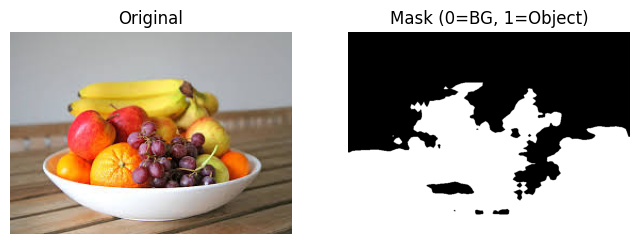

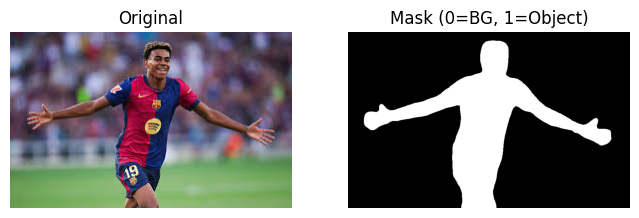

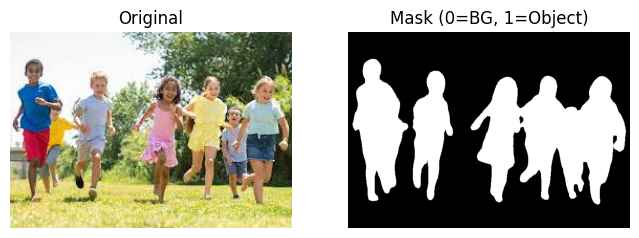

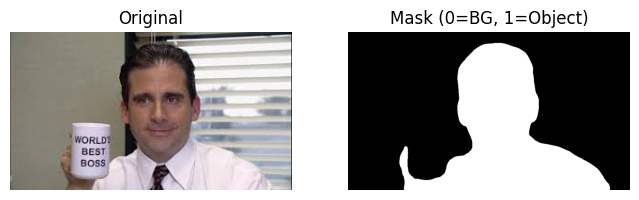

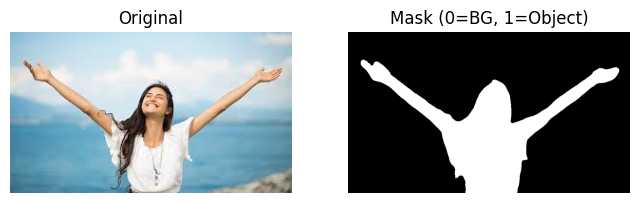

In [9]:
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Load pretrained DeepLabV3 model with updated API
weights = torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT
model = torchvision.models.segmentation.deeplabv3_resnet50(weights=weights).eval()

# Preprocess transform
preprocess = weights.transforms()

images_path = "../images"
masks_path = "../output_masks"
os.makedirs(masks_path, exist_ok=True)

for fname in os.listdir(images_path):
    img_path = os.path.join(images_path, fname)
    img = Image.open(img_path).convert("RGB")

    # Apply preprocessing
    input_tensor = preprocess(img).unsqueeze(0)

    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    mask = output.argmax(0).byte().cpu().numpy()

    # Convert to binary mask (everything that is not background → 1)
    binary_mask = (mask != 0).astype(np.uint8) * 255

    # Save mask
    mask_name = os.path.splitext(fname)[0] + "_mask.png"
    cv2.imwrite(os.path.join(masks_path, mask_name), binary_mask)

    # Show result
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(binary_mask, cmap="gray")
    plt.title("Mask (0=BG, 1=Object)")
    plt.axis("off")
    plt.show()




    
